# Đề kiểm tra lập trình nhập môn phân tích dữ liệu và học sâu

In [60]:
# Họ và Tên: Nguyễn Tấn Đạt
# MSSV: 2174802010469

In [61]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [62]:
#Bước 1: Load data
def load_dataset():
    X, y = load_iris(return_X_y=True)
    X = X[y!=2]
    y = y[y!=2]
    return X,y
#Điền ở đây
X,y =load_dataset() 
print(X.shape,y.shape)

(100, 4) (100,)


Kết quả: (100, 4) (100,)

[]

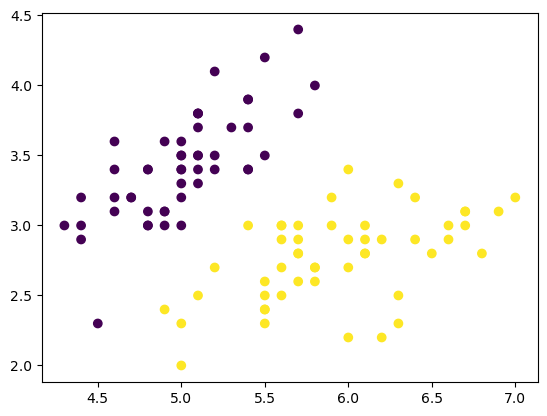

In [63]:
#Trực quan hóa dữ liệu data
#Điền code ở đây
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot()

Kết quả

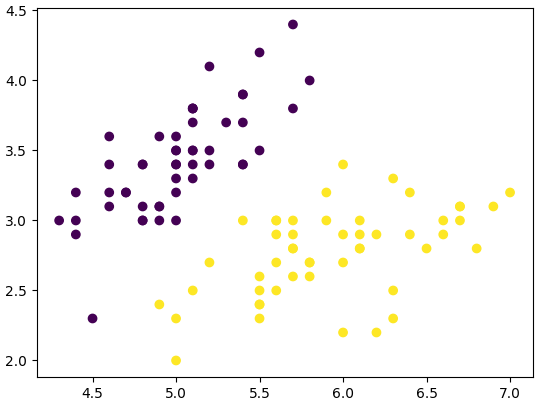

In [64]:
# Bước 2: Định nghĩa mô hình hồi quy logistic bằng PyTorch
class LogisticRegressTorch(nn.Module):
    def __init__(self, n_features):
        super(LogisticRegressTorch, self).__init__()
        #Điền ở đây theo comment                # tạo một lớp tuyến tính (nn.Linear) với n_features đầu vào và 1 đầu ra
        self.linear=nn.Linear(n_features, 1)
    def forward(self, x):
        return torch.sigmoid(self.linear(x))


In [65]:
# Bước 3: Định nghĩa lớp dữ liệu
class IrisTorch(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)
    
    def __len__(self):
        return len(self.X)  #Điền ở đây theo comment            #trả về số lượng mẫu trong tập dữ liệu (số lượng hàng trong self.X)
    
    def __getitem__(self, idx):
        x,y = self.X[idx], self.y[idx]
        return  (x,y) #Điền ở đây theo comment            #trả về một cặp đặc trưng và nhãn tương ứng với chỉ số idx

In [66]:
# Tạo dữ liệu
dataset = IrisTorch(X,y)

In [67]:
# Bước 4: Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra bằng cách chia ngẫu nhiên 70,30.
train_size = int(0.7 * len(dataset))                                    #70%
test_size =  len(dataset) - train_size                                        #30%
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [101]:
# Tạo DataLoader
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size= batch_size, shuffle= True)
test_loader = DataLoader(test_dataset, batch_size= batch_size, shuffle= True)

# for i, u in enumerate(train_loader):
#     print(u)

In [104]:
# Bước 5: Định nghĩa criterion và optimizer

n_features = X.shape[1]
model = LogisticRegressTorch(n_features)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), 0.001)

In [105]:
# Huấn luyện mô hình
n_epochs = 200
train_losses = []
test_losses = []
test_accuracies = []

for epoch in range(n_epochs):
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)
    
    # Đánh giá trên tập kiểm tra
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)
            
            predicted = (outputs >= 0.5).float()
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    
    accuracy = correct / total
    test_accuracies.append(accuracy)
    
    print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/200, Train Loss: 1.4787, Test Loss: 1.7994, Test Accuracy: 0.4333
Epoch 2/200, Train Loss: 1.4597, Test Loss: 1.7791, Test Accuracy: 0.4333
Epoch 3/200, Train Loss: 1.4439, Test Loss: 1.7596, Test Accuracy: 0.4333
Epoch 4/200, Train Loss: 1.4281, Test Loss: 1.7338, Test Accuracy: 0.4333
Epoch 5/200, Train Loss: 1.4080, Test Loss: 1.7097, Test Accuracy: 0.4333
Epoch 6/200, Train Loss: 1.3889, Test Loss: 1.6817, Test Accuracy: 0.4333
Epoch 7/200, Train Loss: 1.3666, Test Loss: 1.6484, Test Accuracy: 0.4333
Epoch 8/200, Train Loss: 1.3410, Test Loss: 1.6202, Test Accuracy: 0.4333
Epoch 9/200, Train Loss: 1.3197, Test Loss: 1.6019, Test Accuracy: 0.4333
Epoch 10/200, Train Loss: 1.3040, Test Loss: 1.5625, Test Accuracy: 0.4333
Epoch 11/200, Train Loss: 1.2748, Test Loss: 1.5445, Test Accuracy: 0.4333
Epoch 12/200, Train Loss: 1.2607, Test Loss: 1.5260, Test Accuracy: 0.4333
Epoch 13/200, Train Loss: 1.2454, Test Loss: 1.4948, Test Accuracy: 0.4333
Epoch 14/200, Train Loss: 1.2214, 

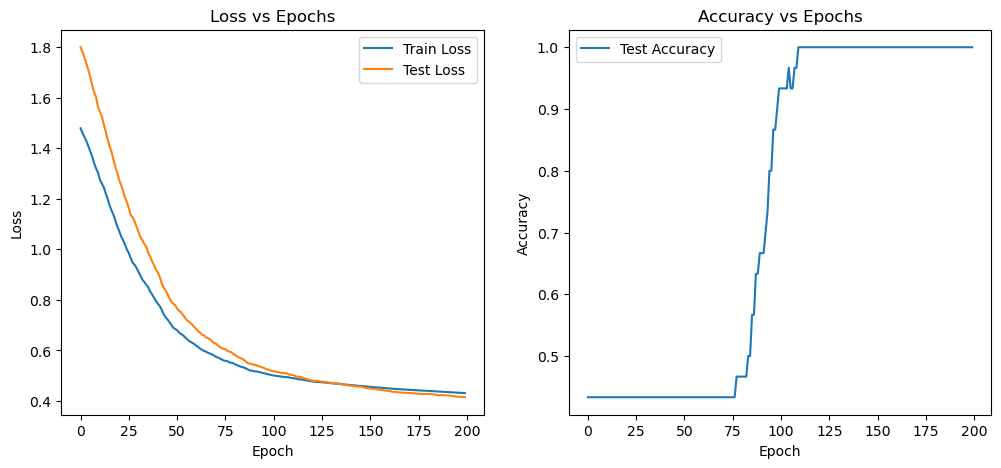

In [107]:
# Vẽ biểu đồ loss và accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')

plt.show()



#Kết quả:

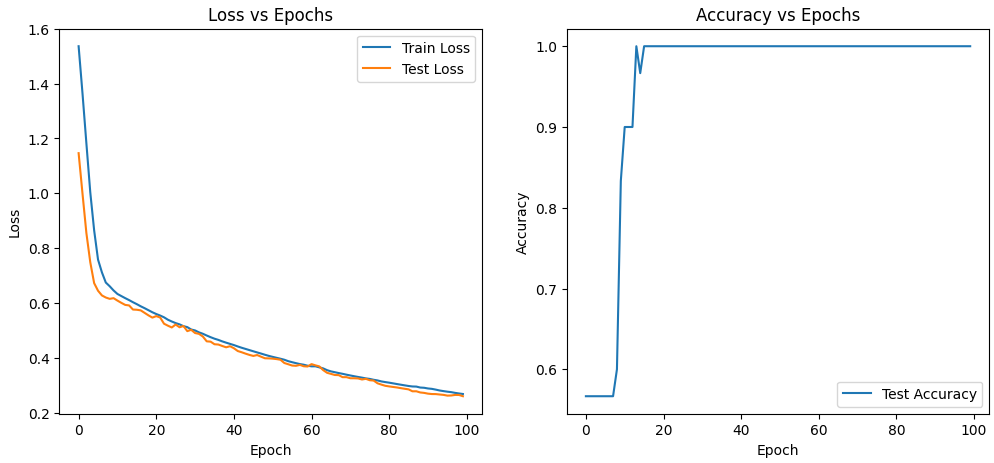